# Projeto de Eletromagnetismo e Ondulatória - (Wireless Power Transfer) - WPT


## Diagrama do modelo eletrodinâmico do circuito

<img src="/circuito.png" alt="MarineGEO circle logo" style="height: 100px; width:100px;"/>

![efw](circuito.png)

## Importações

In [5]:
from cmath import *
from math import sqrt, pow, pi
import numpy as np
import matplotlib.pyplot as plt

## Funções

A função `CalculaTransformador` recebe os parâmetros do circuito e nos retornas as correntes no transformador primário e no secundário

In [30]:
def CalcularTransformador(Uf, Rc, k, R1, L1, C1, p):
    # Tensão da fonte (pico) = Uf

    # Coeficiente de acoplamento = k

    # Indutâncias
    L2 = L1

    # Resistências
    R2 = R1

    # Capacitâncias
    C2 = C1

    # Frequência
    f = 60

    # Frequência angular
    w = 2*pi*f
    

    # Ressonância
    wr = 1/sqrt(L1*C1)
    
    
    # Indutância mútua
    M = k * sqrt(L1*L2)
    

    # Reatâncias do transformador
    XL1 = 1j*w*L1
    XL2 = 1j*w*L2
    
    XC1 = 1/1j*w*C1
    XC2 = 1/1j*w*C2
    
    XM = 1j*w*M
    
    if p:
        print(f"A Indutäncia Mútua M:{M} Henry")
        print(f"A frequência de ressonancia Wr é: {wr} Rad/s")
        print(f"A frequência angular W é: {w} Rad/s")
        print(f"Reatancia do indutor: {XL1}")
        print(f"Reatancia do capacitor: {XC1}")
        print(f"Reatancia dos transformadores: {XM}")

        print(f"-"*30)

    # Impedância Equivalente
    Z = np.array([[XC1 + R1 + XL1, -XM], [-XM, XL1 + R2 + ( (1/XC2 + 1/Rc) **(-1) ) ]])
    # Tensão em forma fasorial
    V = np.array([Uf,0])
    # i trata-se de uma tupla com os valores fasorias de i1 e i2
    i = np.dot(np.linalg.inv(Z),V)
    
    return i[0], i[1]


## Declarações das variáveis

***Calculando*** as ***correntes 1 e 2**

In [32]:

# Entradas da função: Uf(volts), Rc(ohms), k, R1(ohms), L1(Henry), C1(Henry)
Uf = 5      # Tensão da fonte (pico)
Rc = 5      # Resistência do capacitor
k = 0.1     # Coeficiente de acoplamento
R1 = 0.5    # Resistência do resistor
L1 = 300e-3 # Indutância do indutor1
L2 = L1     # Indutância do indutor2
C1 = 1e-6   # Capacitância dos capacitores
#print = true
# --------------------------- Cálculo das Correntes -------------------------- #
i1, i2 = CalcularTransformador(Uf, Rc, k, R1, L1, C1, True)
print(f"i1: {i1}")
print(f"i2: {i2}")



A Indutäncia Mútua M:0.03 Henry
A frequência de ressonancia Wr é: 1825.7418583505537 Rad/s
A frequência angular W é: 376.99111843077515 Rad/s
Reatancia do indutor: 113.09733552923254j
Reatancia do capacitor: -0.00037699111843077514j
Reatancia dos transformadores: 11.309733552923253j
------------------------------
i1: (0.00020140958696880933-0.04465550373411434j)
i2: (3.988244616217e-05-0.0044653889389075305j)


***Calculando*** a tensao ***v2***, ***correntes*** e ***tensoes*** de ***picos***, ***relacao v1/v2*** e as ***potencias***


In [23]:
# ------------------------------ Tensão de Saída ----------------------------- #
v2 = i2 * Rc

print('Com resistor na saída de %.2f Ω:' %Rc)
print('i1 (pico) = %.2f A' %np.abs(i1))
print('i2 (pico) = %.2f A' %np.abs(i2))
print('V1 (pico) = %.2f V' %Uf)
print('V2 (pico) = %.2f V' %(np.abs(v2)))
print('Relação V1/V2 = %.2f' %(np.abs(Uf/(v2))))

# Potências:
S2 = v2 * i2.conjugate()/2
print('Potência real = %.2f' %(S2.real))

Com resistor na saída de 5.00 Ω:
i1 (pico) = 0.04 A
i2 (pico) = 0.00 A
V1 (pico) = 5.00 V
V2 (pico) = 0.02 V
Relação V1/V2 = 223.94
Potência real = 0.00


***Parte 3*** da etapa 1

***Parte 4*** da etapa 1

***Parte 5*** da etapa 1

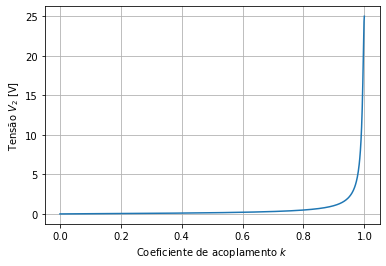

In [33]:
#Construção de um gráfico que relacione o valor de pico da tensão no secundário (no resistor RC) com o coeficiente de acoplamento
K=np.linspace(0,1,1000)
V2=[]
f = 60 # Frequencia fixa
w = 2 * pi * f



for k in K:
    m = k*sqrt(L1*L2)
    xm = 1j*w*m
    i1, i2 = CalcularTransformador(Uf, Rc, k, R1, L1, C1, False)
    V2.append(abs(Rc*i2))
    
plt.plot(K,V2)
plt.xlabel("Coeficiente de acoplamento $k$")
plt.ylabel("Tensão $V_2$ [V]")
plt.grid(True)
plt.show()